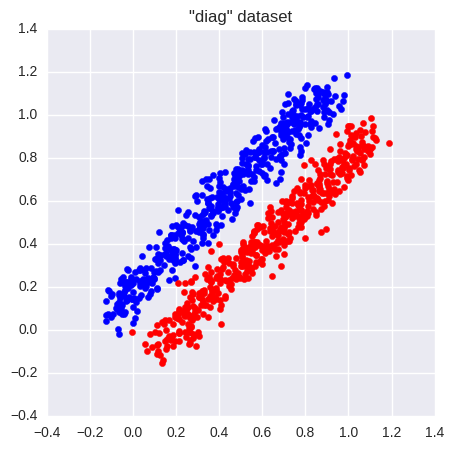

In [5]:
# importujemy potrzebne biblioteki
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import Pipeline

# Dataset "breast cancer", był już w L7
data = pd.read_csv("data/L8/breast_cancer_transformer.csv")
data.drop("Unnamed: 32",axis=1,inplace=True)
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})
prediction_var = [
    u'radius_mean', u'texture_mean', u'perimeter_mean',
    u'area_mean', u'smoothness_mean', u'compactness_mean',
    u'concavity_mean', u'concave points_mean', u'symmetry_mean',
    u'fractal_dimension_mean', u'radius_se', u'texture_se', u'perimeter_se',
    u'area_se', u'smoothness_se', u'compactness_se', u'concavity_se',
    u'concave points_se', u'symmetry_se', u'fractal_dimension_se',
    u'radius_worst', u'texture_worst', u'perimeter_worst', u'area_worst',
    u'smoothness_worst', u'compactness_worst', u'concavity_worst',
    u'concave points_worst', u'symmetry_worst', u'fractal_dimension_worst'
]
train, test = train_test_split(data, test_size = 0.3)
bc_train_X = train[prediction_var].values
bc_train_y=train.diagnosis.values
bc_test_X= test[prediction_var].values
bc_test_y =test.diagnosis.values

# MNIST
mnist = fetch_mldata('MNIST original')
mnist_X = mnist["data"]
mnist_y = mnist["target"].astype(np.int64)

# Syntetyczny dataset "diag", 2 równoliczne klasy, rysunek poniżej
how_many = 500
rng = np.random.RandomState(43)
_X = rng.uniform(size=how_many).reshape(-1,1)
X1 = np.hstack((_X, _X))
X1 += np.array([-0.1, 0.1])
X1 += rng.normal(scale=0.05, size=X1.shape)
_X = rng.uniform(size=how_many).reshape(-1,1)
X2 = np.hstack((_X, _X))
X2 += np.array([0.1, -0.1])
X2 += rng.normal(scale=0.05, size=X1.shape)
diag_X = np.vstack((X1, X2))
diag_y = np.hstack((np.zeros(how_many), np.ones(how_many)))
plt.figure(figsize=(5,5))
plt.scatter(X1[:,0], X1[:,1], color="b")
plt.scatter(X2[:,0], X2[:,1], color="r")
plt.title('"diag" dataset')
plt.show()

## Ćwiczenie 1 [2 pkt]

Wytrenować:
* pojedyncze drzewo decyzyjne,
* Random Forest,
* pojedyncze drzewo decyzyjne po zamianie drugiej kolumny X na różnicę pierwszej i drugiej kolumny X

dla datasetu "diag" i zaznaczyć obszary decyzyjne (3 modele i 3 ilustracje).

(-0.25351980593055884, 1.2839801940694426)

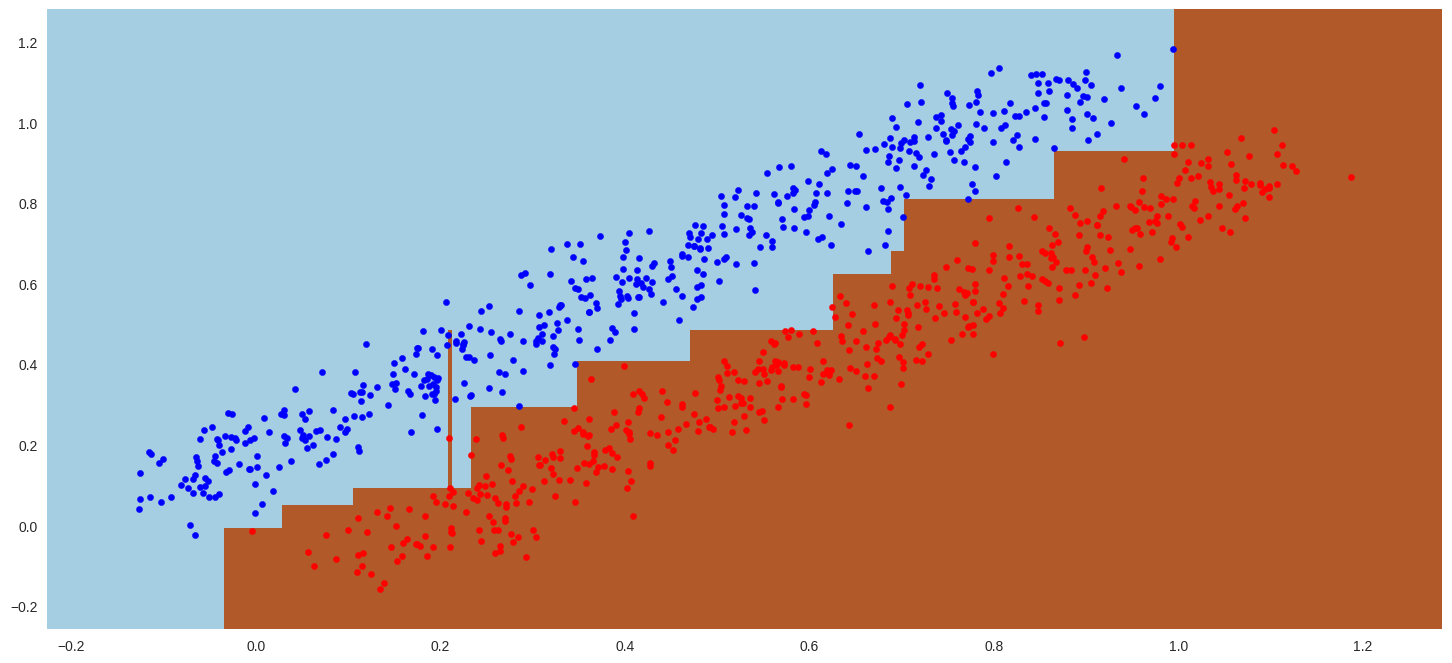

In [38]:
#Pojedyncze drzewo decyzyjne

cls = DecisionTreeClassifier()
cls.fit(diag_X, diag_y)
    

fig, ax = plt.subplots(1,1,figsize=(18, 8))

h=0.0025
x_min, x_max = diag_X[:, 0].min() - .1, diag_X[:, 0].max() + .1
y_min, y_max = diag_X[:, 1].min() - .1, diag_X[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = cls.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
    
ax.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X1[:,0], X1[:,1], color="b")
plt.scatter(X2[:,0], X2[:,1], color="r")
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

(-0.25351980593055884, 1.2839801940694426)

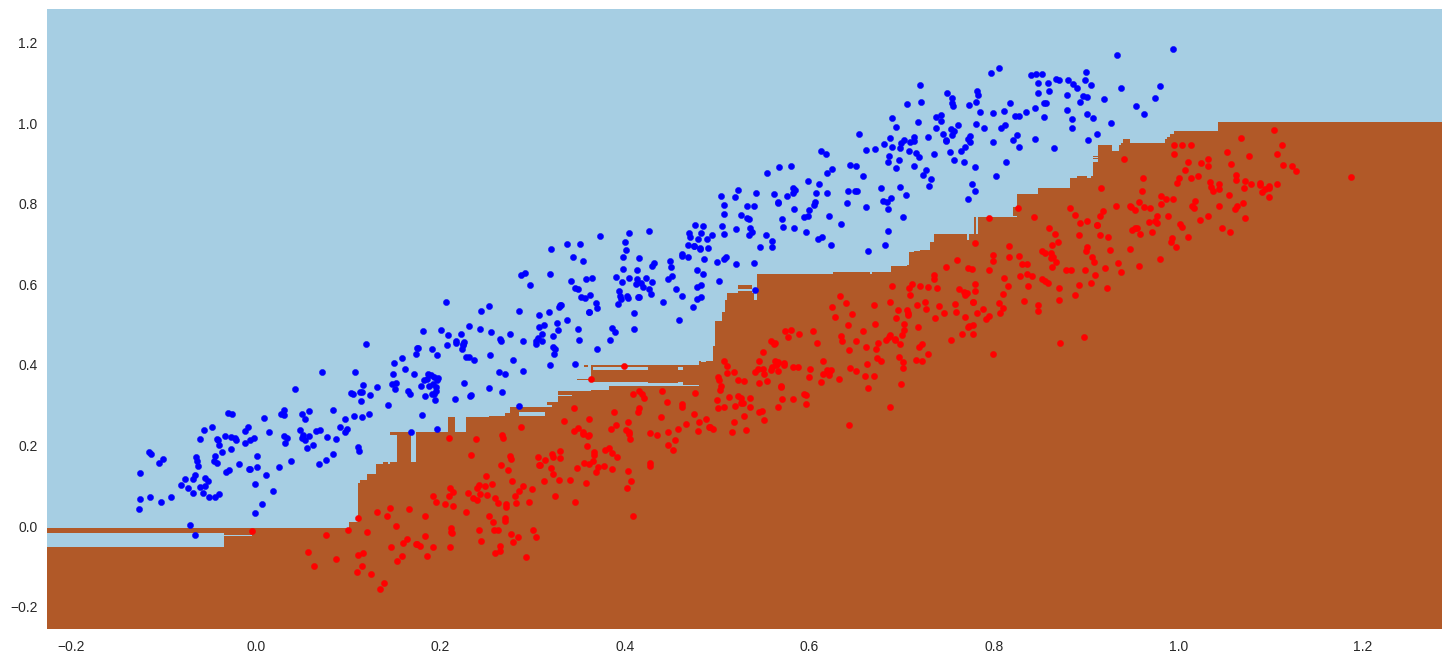

In [39]:
#Random Forest

clf = RandomForestClassifier()
clf.fit(diag_X, diag_y)
    

fig, ax = plt.subplots(1,1,figsize=(18, 8))

h=0.0025
x_min, x_max = diag_X[:, 0].min() - .1, diag_X[:, 0].max() + .1
y_min, y_max = diag_X[:, 1].min() - .1, diag_X[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
    
ax.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X1[:,0], X1[:,1], color="b")
plt.scatter(X2[:,0], X2[:,1], color="r")
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

(-0.47738457232397447, 0.52511542767602637)

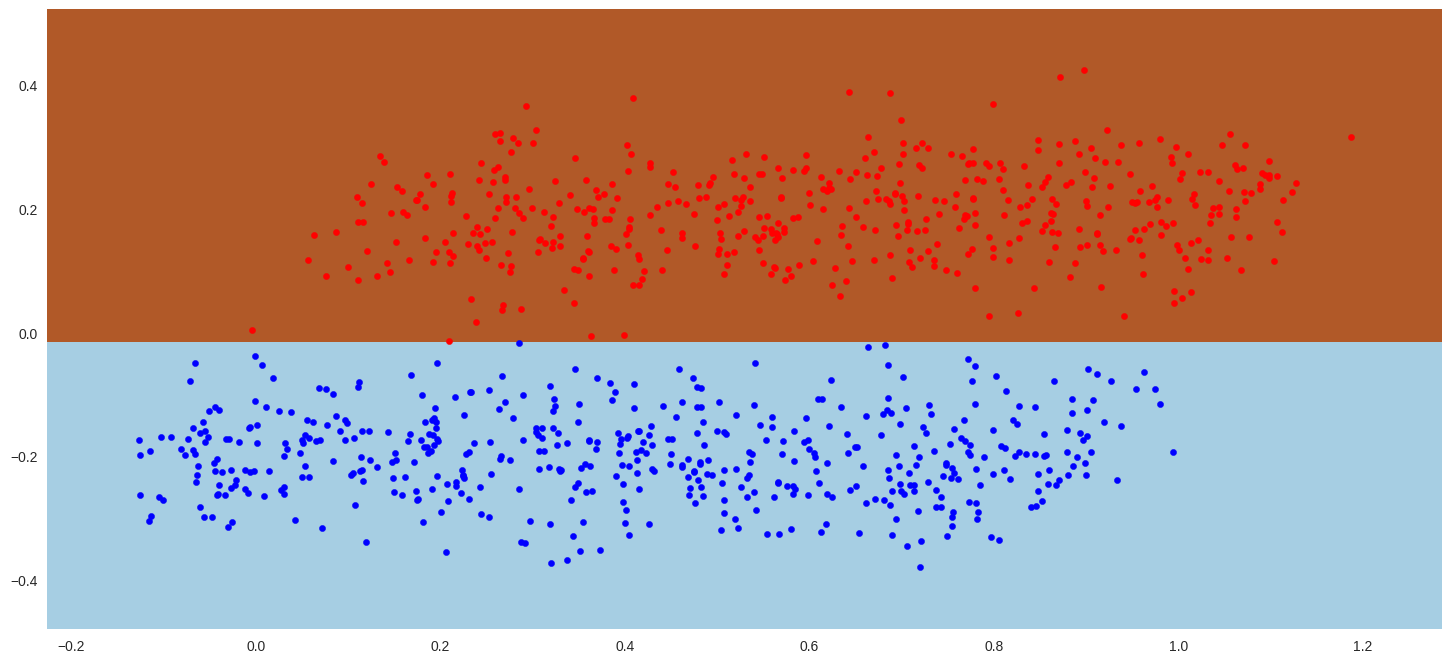

In [40]:
#Pojedyncze drzewo decyzyjne z zamianą

new_X1 = np.array([[v[0],v[0]-v[1]] for v in X1])
new_X2 = np.array([[v[0],v[0]-v[1]] for v in X2])
new_diag_X = np.vstack((new_X1, new_X2))

cls = DecisionTreeClassifier()
cls.fit(new_diag_X, diag_y)
    

fig, ax = plt.subplots(1,1,figsize=(18, 8))

h=0.0025
x_min, x_max = new_diag_X[:, 0].min() - .1, new_diag_X[:, 0].max() + .1
y_min, y_max = new_diag_X[:, 1].min() - .1, new_diag_X[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = cls.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
    
ax.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(new_X1[:,0], new_X1[:,1], color="b")
plt.scatter(new_X2[:,0], new_X2[:,1], color="r")
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

## Ćwiczenie 2 [2 pkt]

Używając klasy Pipeline połączyć PCA (bez zmniejszania wymiaru) z pojedynczym drzewem decyzyjnym i wytrenować na datasecie "diag". Zaznaczyć kolorem obszary decyzyjne. Wytłumaczyć wynik.

(-0.25351980593055884, 1.2839801940694426)

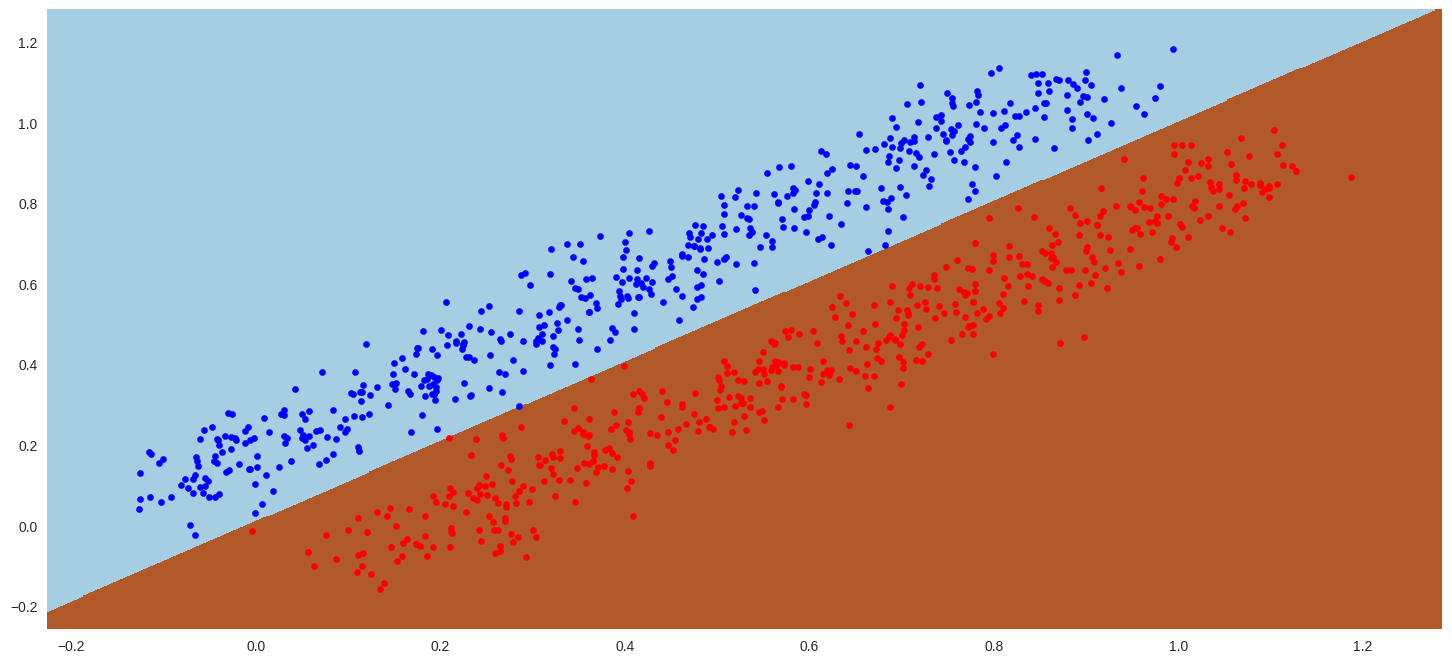

In [37]:
pipe = Pipeline([('pca', PCA(n_components = 2)), ('cls', DecisionTreeClassifier())])

pipe.fit(diag_X, diag_y)
    

fig, ax = plt.subplots(1,1,figsize=(18, 8))

h=0.0025
x_min, x_max = diag_X[:, 0].min() - .1, diag_X[:, 0].max() + .1
y_min, y_max = diag_X[:, 1].min() - .1, diag_X[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = pipe.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
    
ax.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X1[:,0], X1[:,1], color="b")
plt.scatter(X2[:,0], X2[:,1], color="r")
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())


Wyszukana została kombinacja liniowa, będąca różnicą pierwszej i drugiej kolumny, która oscyluje wokół jednej z dwóch stałych. Sytuacja została więc sprowadzona do ostatniego przykładu z poprzedniego ćwiczenia.

## Ćwiczenie 3 [2 pkt]

Na datasecie "breast cancer" należy wytrenować dwie serie modelów: Random Forest oraz ensemble regresji logistycznych (BaggingClassifier w połączeniu z LogisticRegression). Należy włączyć liczenie oob_score, można też uczyć wielowątkowo. Należy zostawić domyślne wartości wszystkich hiperparametrów poza liczbą estymatorów.

Narysować wykres:
* poziomo - liczba estymatorów (w zakresie np. 1-50, można przeskakiwać co kilka),
* pionowo sześć rzeczy:
    * Random Forest training score,
    * Random Forest test score,
    * Random Forest oob_score,
    * Ensemble LR training score,
    * Ensemble LR test score,
    * Ensemble LR oob_score,

dodać ładną legendę itp.

In [51]:
import warnings
warnings.simplefilter('ignore')

rf_train_score = []
rf_test_score = []
rf_oob_score = []
enlr_train_score = []
enlr_test_score = []
enlr_oob_score = []

for i in range(1,50):
    clf = RandomForestClassifier(n_estimators = i, oob_score = True)
    clf.fit(bc_train_X, bc_train_y)
    clf_train_pred = clf.predict(bc_train_X)
    clf_test_pred = clf.predict(bc_test_X)
    
    enlr = BaggingClassifier(LogisticRegression(), n_estimators = i, oob_score = True)
    enlr.fit(bc_train_X, bc_train_y)
    enlr_train_pred = enlr.predict(bc_train_X)
    enlr_test_pred = enlr.predict(bc_test_X)
    
    rf_train_score.append(accuracy_score(bc_train_y, clf_train_pred,))
    rf_test_score.append(accuracy_score(bc_test_y, clf_test_pred,))
    rf_oob_score.append(clf.oob_score_)
    enlr_train_score.append(accuracy_score(bc_train_y, enlr_train_pred,))
    enlr_test_score.append(accuracy_score(bc_test_y, enlr_test_pred,))
    enlr_oob_score.append(enlr.oob_score_)

/home/kacper/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/kacper/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/bagging.py:603: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/kacper/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/kacper/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/bagging.py:603: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob e

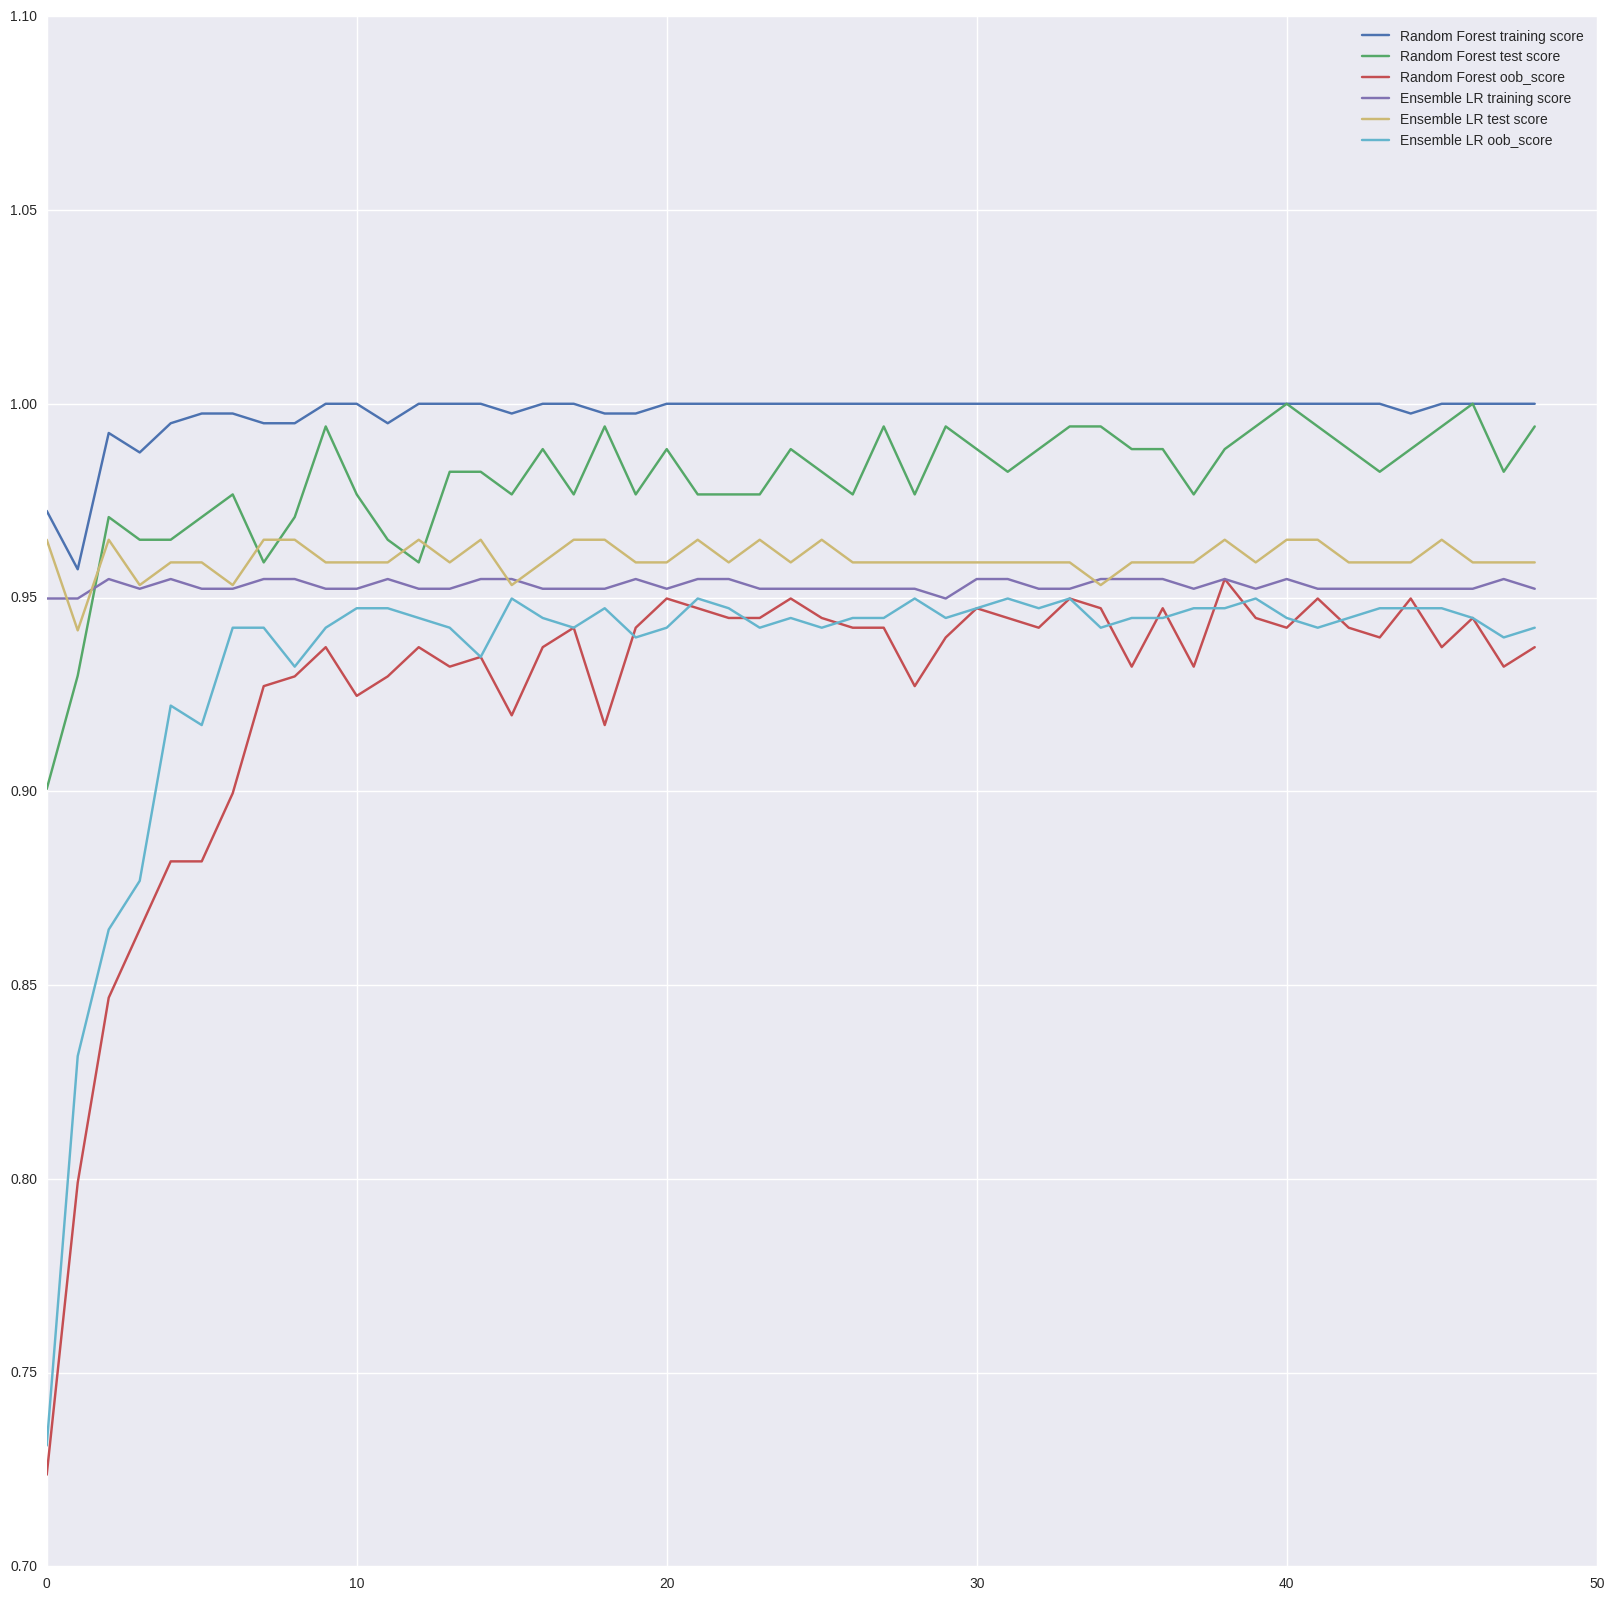

In [58]:
plt.figure(figsize=(20,20))

plt.plot(rf_train_score, label = "Random Forest training score")
plt.plot(rf_test_score, label = "Random Forest test score")
plt.plot(rf_oob_score, label = "Random Forest oob_score")
plt.plot(enlr_train_score, label = "Ensemble LR training score")
plt.plot(enlr_test_score, label = "Ensemble LR test score")
plt.plot(enlr_oob_score, label = "Ensemble LR oob_score")

plt.ylim((0.7, 1.1))
plt.legend()

## Ćwiczenie 4 [2 pkt]

Wytrenować Random Forest (30 lub 100 drzew) na datasecie MNIST. Narysować istotność poszczególnych pikseli. Ograniczyć się tylko do cyfr 6, 8, 9 i zrobić to samo, wyjaśnić różnicę.

Przykład dla zdjęć twarzy: http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances_faces.html

Oczekiwany efekt:
<img width=300 src="figures/L8/mnist_features.png">
<img width=300 src="figures/L8/mnist_features_689.png">


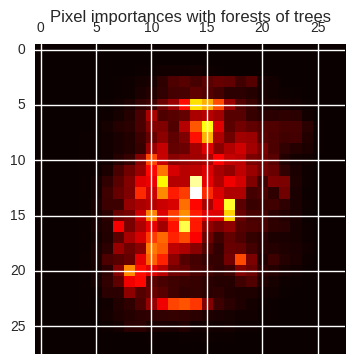

In [85]:
forest = RandomForestClassifier(n_estimators=100,
                              max_features=128,
                              random_state=0)

forest.fit(mnist_X, mnist_y)

importances = forest.feature_importances_
importances = importances.reshape(28,28)

# Plot pixel importances
plt.matshow(importances, cmap=plt.cm.hot)
plt.title("Pixel importances with forests of trees")
plt.show()

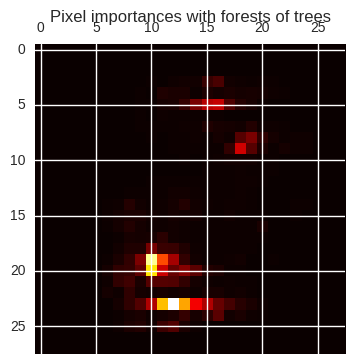

In [84]:
X = []
y = []
for i in range(len(mnist_X)):
    if mnist_y[i] == 6 or mnist_y[i] == 8 or mnist_y[i] == 9:
        X.append(mnist_X[i])
        y.append(mnist_y[i])

forest = RandomForestClassifier(n_estimators=100,
                              max_features=128,
                              random_state=0)

forest.fit(X, y)

importances = forest.feature_importances_
importances = importances.reshape(28,28)

# Plot pixel importances
plt.matshow(importances, cmap=plt.cm.hot)
plt.title("Pixel importances with forests of trees")
plt.show()

Rozpatrując wszystkie możliwe cyfry bardzo trudne wyróżnić miejsca na obrazku, które pozwalają nam jednoznacznie określić cyfrę. Sytuacja zmienia się diametralnie, gdy ograniczamy się do podzbioru "6,8,9". Obecność "sygnału" zarówno w prawym górnym rogu i lewym dolnym wskazuje na ósemkę, a tylko w prawym górnym albo lewym dolnym odpowiednio na dziewiątkę i szóstkę.